In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [120]:
df = pd.read_csv('US House Prices.csv',parse_dates=['DATE'],index_col=['DATE'])
df.sample(5)

,USSTHPI
DATE,
1993-01-01,175.67
1984-01-01,119.47
2010-01-07,326.13
2000-01-04,233.88
1992-01-04,172.74


In [60]:
from sklearn.model_selection import train_test_split
df['day'] = df.DATE.dt.day
df['month'] = df.DATE.dt.month
df['year'] = df.DATE.dt.year
df.drop('DATE',axis=1,inplace=True)
df.sample(9)
#df.USSTHPI.sample(160)

,USSTHPI,day,month,year
163,363.76,10,1,2015
156,331.84,1,1,2014
63,166.28,10,1,1990
16,91.41,1,1,1979
9,72.71,4,1,1977
76,181.39,1,1,1994
168,387.20,1,1,2017
149,308.37,4,1,2012
93,209.77,4,1,1998


In [61]:
from sklearn.model_selection import train_test_split
X, y = df.drop('USSTHPI',axis=1),df.USSTHPI
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [192]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict([[20,10,2022]])
y_pred

array([446.07715966])

In [217]:
df.index.max()

Timestamp('2020-01-07 00:00:00')

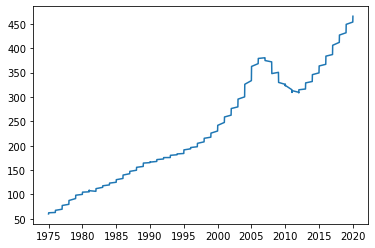

In [129]:
plt.plot(df.index,df.USSTHPI)

In [183]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df,order=(2,1,2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(180)
print(yhat)

DATE
2020-01-01    453.607113
2020-01-04    458.583288
2020-01-07    461.676736
Name: predicted_mean, dtype: float64


In [228]:
year1 = np.arange(365*10)+np.datetime64('2020-01-07')
len(year1)

3650

In [229]:
year1_pred = []
for i in range(184,3834):
    year1_pred.append(model_fit.predict(i))

In [230]:
len(year1_pred)

3650

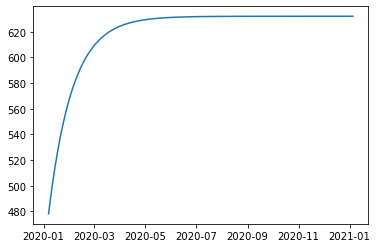

In [231]:
plt.plot(year1[:365],np.array(year1_pred)[:365])

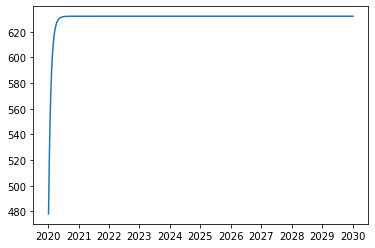

In [232]:
plt.plot(year1,np.array(year1_pred))